In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

In [2]:
#         https://docs.google.com/spreadsheets/d/1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ/edit#gid=1724592523
source = "https://docs.google.com/spreadsheets/d/1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ/export?format=csv&gid=1724592523"
df = pd.read_csv(source)

# Прочитайте отриману таблицю, використовуючи метод head

In [3]:
df.head(5)

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


# Визначте розмір таблиці за допомогою методу shape

In [4]:
df.shape

(8704, 25)

# Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [5]:
df.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [6]:
df_columns = df.columns
for columns in df_columns:
    nan_values = (df[columns].isnull().sum()/len(df))*100
    if nan_values > 0:
        print(f"{columns}: {round(nan_values, 2)} %")

Мова програмування: 44.23 %
Спеціалізація: 82.94 %
Університет: 4.11 %
Предметна область: 2.56 %
Валюта: 99.89 %
cls: 18.08 %


# Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [7]:
language_column = df[['Мова програмування']]

df_cleaned = df.drop(columns=['Мова програмування']).dropna(axis=1)

df = pd.concat([language_column, df_cleaned], axis=1)
df

,Мова програмування,N,Посада,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
0,NaN,1,Junior QA engineer,0.5,0.5,400,0,Харків,до 10 осіб,Аутсорсингова,жіноча,20,Неповна Вища,True,Pre-intermediate (нище середнього),12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,NaN,2,Junior QA engineer,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,Аутсорсингова,жіноча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,C#/.NET,3,Software Engineer,4,1,2500,800,Київ,до 1000 осіб,Аутсорсингова,чоловіча,26,Вища,False,Intermediate (середній),12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,JavaScript,4,Software Engineer,5,4,2000,400,Одеса,до 200 осіб,Продуктова,чоловіча,30,Середня,False,Pre-intermediate (нище середнього),12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,JavaScript,5,Senior Software Engineer,10 і більше років,0.5,4500,500,Інше,до 10 осіб,Продуктова,чоловіча,30,Технікум / Коледж,False,Intermediate (середній),12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,NaN,8700,QA engineer,1,менше 3 місяців,700,700,Одеса,до 50 осіб,Аутсорсингова,чоловіча,23,Вища,False,Intermediate (середній),12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700
8700,NaN,8701,Marketing,0.5,0.5,400,120,Київ,до 50 осіб,Продуктова,жіноча,22,Вища,False,Pre-intermediate (нище середнього),12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
8701,Ruby/Rails,8702,Junior Software Engineer,1,0.5,800,500,Львів,до 10 осіб,Аутстафінгова,чоловіча,30,Неповна Вища,False,Upper-Intermediate (вище середнього),12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800
8702,NaN,8703,Team lead,6,4,2600,0,Дніпро,більше 1000 осіб,Аутсорсингова,чоловіча,34,Вища,False,Advanced (просунутий),12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600


# Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [8]:
df_columns = df.columns
for columns in df_columns:
    nan_values = (df[columns].isnull().sum()/len(df))*100
    if nan_values > 0:
        print(f"{columns}: {round(nan_values, 2)} %")

Мова програмування: 44.23 %


# Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [9]:
df = df.dropna(axis=0).reset_index(drop=True)

# Визначте новий розмір таблиці за допомогою методу shape

In [10]:
df.shape

(4854, 20)

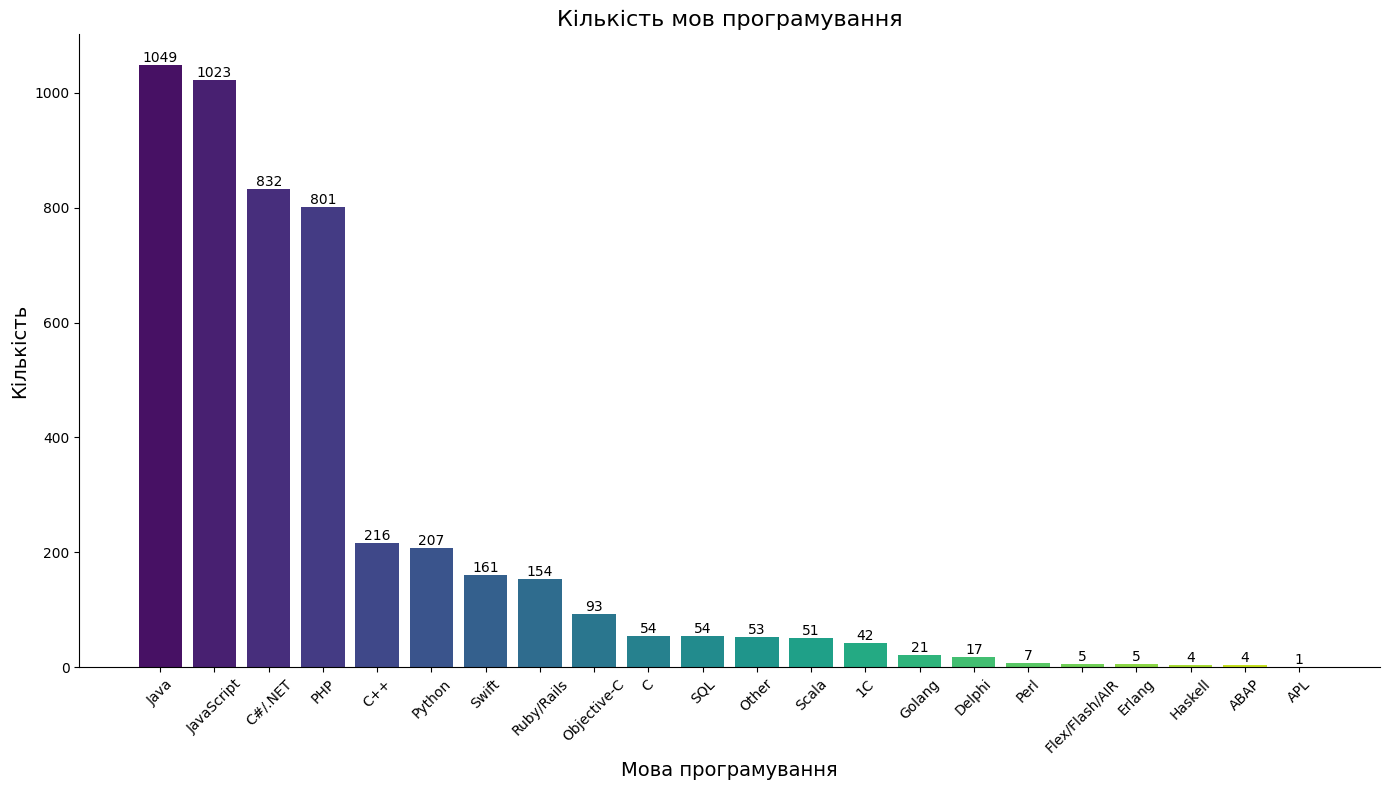

In [11]:
# Припускаємо, у вас є DataFrame df, і колонка з мовами програмування називається 'Мова програмування'
language_counts = df['Мова програмування'].value_counts()

# Після цього ви можете продовжити зі створенням графіка
plt.figure(figsize=(14, 8))
palette_colors = sns.color_palette('viridis', n_colors=len(language_counts))
plt.bar(language_counts.index, language_counts.values, color=palette_colors)

plt.title('Кількість мов програмування', fontsize=16)
plt.xlabel('Мова програмування', fontsize=14)
plt.ylabel('Кількість', fontsize=14)

for i, count in enumerate(language_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

sns.despine()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

In [12]:
python_data = df[df['Мова програмування'] == 'Python'].reset_index(drop=True)
python_data

,Мова програмування,N,Посада,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
0,Python,13,Software Engineer,1,менше 3 місяців,800,200,Київ,до 50 осіб,Аутсорсингова,чоловіча,26,Вища,False,Pre-intermediate (нище середнього),12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
1,Python,69,Software Engineer,1.5,0.5,900,900,Київ,до 10 осіб,Стартап,чоловіча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
2,Python,88,Junior Software Engineer,0.5,0.5,600,0,Київ,до 10 осіб,Аутсорсингова,чоловіча,19,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
3,Python,115,Junior Software Engineer,1.5,0.5,685,250,Київ,до 1000 осіб,Аутсорсингова,чоловіча,21,Неповна Вища,False,Intermediate (середній),12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
4,Python,144,Junior Software Engineer,1,1,750,250,Київ,до 10 осіб,Аутсорсингова,чоловіча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Python,8547,Software Engineer,5,1,2000,800,Запоріжжя,до 50 осіб,Аутсорсингова,чоловіча,22,Неповна Вища,False,Intermediate (середній),10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000
203,Python,8626,Software Engineer,4,1,1750,0,Київ,більше 1000 осіб,Аутсорсингова,чоловіча,28,Середня,False,Intermediate (середній),11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750
204,Python,8636,Senior Software Engineer,10 і більше років,менше 3 місяців,4000,1300,Віддалено,до 10 осіб,Стартап,чоловіча,33,Вища,False,Upper-Intermediate (вище середнього),11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000
205,Python,8674,Junior Software Engineer,0.5,0.5,350,50,Київ,до 50 осіб,Аутсорсингова,чоловіча,22,Вища,False,Intermediate (середній),12/07/2017 9:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350


# Визначте розмір таблиці python_data за допомогою методу shape

In [13]:
python_data.shape

(207, 20)

# Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

In [14]:
position = python_data.groupby(['Посада'])

# Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [15]:
new_df = position.agg({'Зарплата на місяць' : ['min', 'max']})
new_df

Зарплата на місяць      
                                        min   max
Посада                                           
Junior Software Engineer                100  1250
Senior Software Engineer               1300  9200
Software Engineer                       500  5400
System Architect                       3000  5000
Technical Lead                         1425  6200

# Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [16]:
# def fill_avg_salary(row):
#     return (row[('Зарплата на місяць', 'min')] + row[('Зарплата на місяць', 'max')]) / 2

# new_df['Зарплата на місяць', 'avg'] = new_df.apply(fill_avg_salary, axis=1)

def fill_avg_salary(row):
    return (row.iat[0] + row.iat[1]) / 2

new_df['Зарплата на місяць', 'avg'] = new_df.apply(fill_avg_salary, axis=1)

new_df

Зарплата на місяць              
                                        min   max     avg
Посада                                                   
Junior Software Engineer                100  1250   675.0
Senior Software Engineer               1300  9200  5250.0
Software Engineer                       500  5400  2950.0
System Architect                       3000  5000  4000.0
Technical Lead                         1425  6200  3812.5

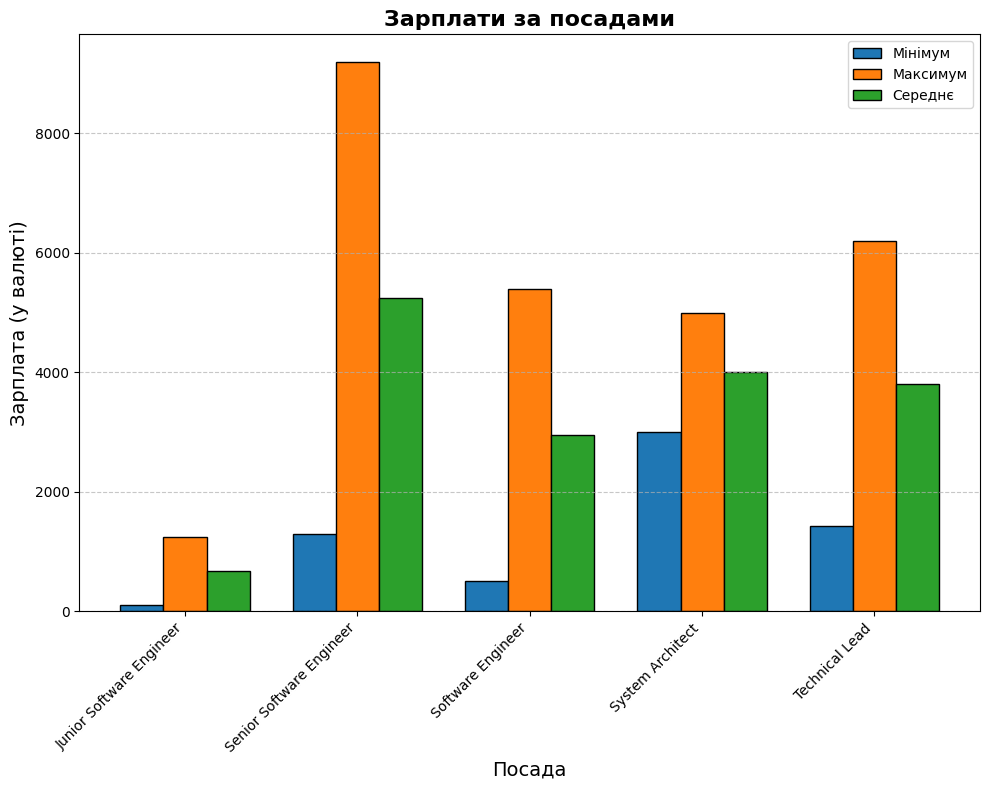

In [17]:
positions = new_df.index

min_salaries = new_df['Зарплата на місяць', 'min']
max_salaries = new_df['Зарплата на місяць', 'max']
avg_salaries = new_df['Зарплата на місяць', 'avg']

plt.figure(figsize=(10, 8))

x = np.arange(len(positions))

bar_width = 0.25

plt.bar(x - bar_width, min_salaries, width=bar_width, label='Мінімум', edgecolor='black')
plt.bar(x, max_salaries, width=bar_width, label='Максимум', edgecolor='black')
plt.bar(x + bar_width, avg_salaries, width=bar_width, label='Середнє', edgecolor='black')

plt.title('Зарплати за посадами', fontsize=16, fontweight='bold')
plt.xlabel('Посада', fontsize=14)
plt.ylabel('Зарплата (у валюті)', fontsize=14)

plt.legend()

plt.xticks(ticks=x, labels=positions, rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

# Створіть описову статистику за допомогою методу describe для нового стовпчика.

In [18]:
desc_stats = new_df['Зарплата на місяць', 'avg'].describe()

print(desc_stats)

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: (Зарплата на місяць, avg), dtype: float64


# Збережіть отриману таблицю в CSV файл


In [19]:
new_df.to_csv("Salary.csv", index = False)
new_df.to_excel("Salary.xlsx")
desc_stats.to_csv("desc_stats.csv", index = False)